In [1]:
import pandas
data = pandas.read_csv("Tweets.csv")
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [2]:
# Check for empties
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [10]:
from sklearn import model_selection # model selection class helps to split our data in training and testing
#split to 30% testing and 70% training
X_train, X_test, Y_train, Y_test =  model_selection.train_test_split(data['text'], data['airline_sentiment'], test_size=0.3, random_state=42)
# x = column text and Y = column airline_sentiment
Y_test


4794     positive
10480    negative
8067     negative
8880      neutral
8292     negative
           ...   
12156    positive
6518      neutral
2245     negative
4165     negative
11671    negative
Name: airline_sentiment, Length: 4392, dtype: object

In [12]:
# removing common word from X_train or X_test, and puting the data in to numerical representation for M.L using a module in sklearn called CountVector
from sklearn.feature_extraction.text import  CountVectorizer # countVectorizer is used to convert text documents into numerical representation based on word frequencies
vectorizer = CountVectorizer(lowercase=True, stop_words='english') # puting our text into lowercase and removing common words from the texts
X_train_new = vectorizer.fit_transform(X_train) # we are going to fit and transform our X_train. tranfrom converts document to numerical representation output
X_train_new

<10248x12061 sparse matrix of type '<class 'numpy.int64'>'
	with 93480 stored elements in Compressed Sparse Row format>

In [13]:
# pass our new X_train data to an algorithm model
from sklearn.linear_model import LogisticRegression, SGDRegressor, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

model = LogisticRegression()
model.fit(X_train_new,Y_train)

LogisticRegression()

In [15]:
#test the model, first we vectorize our data
X_test_new = vectorizer.transform(X_test) #converting X_test data to numerical rep and storing it to var X_test_new
#pass our new X_test to the model to make prediction
prediction = model.predict(X_test_new)
prediction
print(data.groupby('airline_sentiment').size())


airline_sentiment
negative    9178
neutral     3099
positive    2363
dtype: int64


In [16]:
#get the sample dataset
sample = pandas.read_csv('sample.csv')
sample

,Text
0,your airline is awesome but your lax loft need...
1,"not worried, it's been a great ride in a new p..."
2,awesome. I flew yall Sat morning. Any way we c...
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a..."
4,"Hi, Virgin, I like your services"
5,"Your services are bad, its not as expected"
6,Its very unfortunate that I did not get what I...
7,"This is not good, improve!"
8,I waited for 40 minutes but we left though
9,"this is very nice, I enjoyed"


In [18]:
# use the model to predict above clients sentiments
#first thing is to vectorzze our data
new_sample = vectorizer.transform(sample['Text'])
outcome = model.predict(new_sample)
print('the new coments sentiment prediction are:', outcome)
# we will put the output pedictions into a Dataframe(tabular format)
outcome_table = pandas.DataFrame(outcome,columns=['Sentiments'])
outcome_table

the new coments sentiment prediction are: ['negative' 'positive' 'positive' 'neutral' 'neutral' 'negative' 'neutral'
 'positive' 'negative' 'positive' 'negative' 'neutral']


,Sentiments
0,negative
1,positive
2,positive
3,neutral
4,neutral
5,negative
6,neutral
7,positive
8,negative
9,positive


In [19]:
results =  sample.merge(outcome_table, left_index=True,right_index=True)
results

,Text,Sentiments
0,your airline is awesome but your lax loft need...,negative
1,"not worried, it's been a great ride in a new p...",positive
2,awesome. I flew yall Sat morning. Any way we c...,positive
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a...",neutral
4,"Hi, Virgin, I like your services",neutral
5,"Your services are bad, its not as expected",negative
6,Its very unfortunate that I did not get what I...,neutral
7,"This is not good, improve!",positive
8,I waited for 40 minutes but we left though,negative
9,"this is very nice, I enjoyed",positive


<Axes: xlabel='Sentiments', ylabel='count'>

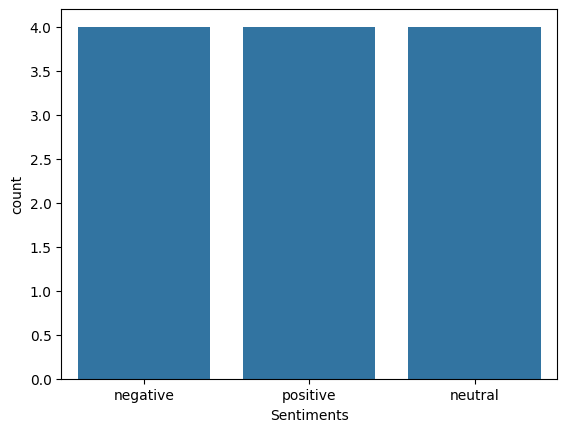

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Sentiments', data= results)

<Axes: >

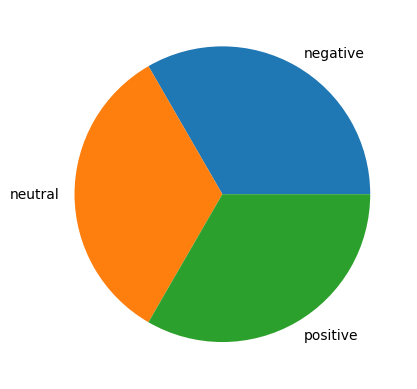

In [23]:
results.groupby('Sentiments').size().plot(kind='pie',auto)